### Gradient Descent
#### To solve for the gradient numerically we use  $f'(w_1)=\dfrac{f(w_1+h)+f(w_1-h)}{2h}$  and  $f'(w_2)=\dfrac{f(w_2+h)+f(w_2-h)}{2h}$ using a small h

In [16]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def gradient(w1, w2):
    h=0.0001
    a = ((((w1+h)**2+w2-11)**2+((w1+h)+w2**2-7)**2)-(((w1-h)**2+w2-11)**2+((w1-h)+w2**2-7)**2))/(2*h)
    b = (((w1**2+(w2+h)-11)**2+(w1+(w2+h)**2-7)**2)-((w1**2+(w2-h)-11)**2+(w1+(w2-h)**2-7)**2))/(2*h)
    
    return a, b

#### 1. Initalize gradient descent from $w_0=[\,0 \quad  -4\,]^T$

In [17]:
# fx = (w1**2+w2-11)**2+(w1+w2**2-7)**2
w = np.zeros(shape=(2,1))
w[0] = 0
w[1] = -4
print(w)

[[ 0.]
 [-4.]]


#### Run algorithm with step size $\gamma=0.005$ 

In [18]:
k = 0
euc_norm = 1
gamma = 0.005
x_k = np.zeros(shape=(2,1))
while euc_norm > 10**(-12):
    k = k + 1
    if(k == 10000):
        break
    x_k[0], x_k[1] = gradient(w[0], w[1])
    euc_norm = math.sqrt(x_k[0]**2+x_k[1]**2)
    if(euc_norm > 10**(-12)):
        w[0] = w[0] - (gamma*x_k[0])
        w[1] = w[1] - (gamma*x_k[1])
print(k, " iterations")
print(w)

94  iterations
[[-3.77931025]
 [-3.28318599]]


#### Run algorithm with step size $\gamma=0.01$ 

In [19]:
w[0] = 0
w[1] = -4
x1 = []
y1 = []
k = 0
euc_norm = 1
gamma = 0.01
x_k = np.zeros(shape=(2,1))
while euc_norm > 10**(-12):
    k = k + 1
    if(k == 10000):
        break
    x1.append(float(w[0]))
    y1.append(float(w[1]))
    x_k[0], x_k[1] = gradient(w[0], w[1])
    euc_norm = math.sqrt(x_k[0]**2+x_k[1]**2)
    if(euc_norm > 10**(-12)):
        w[0] = w[0] - (gamma*x_k[0])
        w[1] = w[1] - (gamma*x_k[1])
    
print(k, " iterations")
print(w)

39  iterations
[[-3.77931025]
 [-3.28318599]]


### 2. Run gradient descent with step size $\gamma=0.01$ for four different initalizations.
#### We already ran it with $w_0=[\,0 \quad  -4\,]^T$ which gave us 39 iterations and $w_0=[\,-3.77931025 \quad  -3.28318599\,]^T$.
#### ii) $w_0=[\,0.5 \quad  -4\,]^T$

In [20]:
w[0] = 0.5
w[1] = -4
x2 = []
y2 = []
k = 0
euc_norm = 1
gamma = 0.01
x_k = np.zeros(shape=(2,1))
while euc_norm > 10**(-12):
    k = k + 1
    if(k == 10000):
        break
    x2.append(float(w[0]))
    y2.append(float(w[1]))
    x_k[0], x_k[1] = gradient(w[0], w[1])
    euc_norm = math.sqrt(x_k[0]**2+x_k[1]**2)
    if(euc_norm > 10**(-12)):
        w[0] = w[0] - (gamma*x_k[0])
        w[1] = w[1] - (gamma*x_k[1])
    
print(k, " iterations")
print(w)

92  iterations
[[ 3.58442834]
 [-1.84812652]]


#### iii) $w^0=[\,0 \quad  4\,]^T$

In [21]:
w[0] = 0
w[1] = 4
k = 0
x3 = []
y3 = []
euc_norm = 1
gamma = 0.01
x_k = np.zeros(shape=(2,1))
while euc_norm > 10**(-12):
    k = k + 1
    if(k == 10000):
        break
    x3.append(float(w[0]))
    y3.append(float(w[1]))
    x_k[0], x_k[1] = gradient(w[0], w[1])
    euc_norm = math.sqrt(x_k[0]**2+x_k[1]**2)
    if(euc_norm > 10**(-12)):
        w[0] = w[0] - (gamma*x_k[0])
        w[1] = w[1] - (gamma*x_k[1])
    
print(k, " iterations")
print(w)

42  iterations
[[-2.80511809]
 [ 3.13131252]]


#### iv) $w_0=[\,0.5 \quad  4\,]^T$

In [22]:
w[0] = 0.5
w[1] = 4
k = 0
x4 = []
y4 = []
euc_norm = 1
gamma = 0.01
x_k = np.zeros(shape=(2,1))
while euc_norm > 10**(-12):
    k = k + 1
    if(k == 10000):
        break
    x4.append(float(w[0]))
    y4.append(float(w[1]))
    x_k[0], x_k[1] = gradient(w[0], w[1])
    euc_norm = math.sqrt(x_k[0]**2+x_k[1]**2)
    if(euc_norm > 10**(-12)):
        w[0] = w[0] - (gamma*x_k[0])
        w[1] = w[1] - (gamma*x_k[1])
    
print(k, " iterations")
print(w)

112  iterations
[[ 3.]
 [ 2.]]


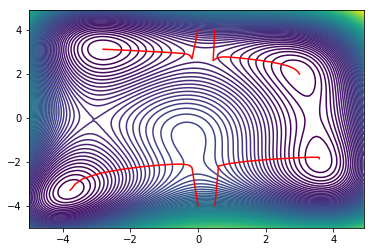

In [23]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = (xx**2+yy-11)**2+(xx+yy**2-7)**2
h = plt.contour(x,y,z, 100)
plt.plot(x1, y1, 'r')
plt.plot(x2, y2, 'r')
plt.plot(x3, y3, 'r')
plt.plot(x4, y4, 'r')
plt.show()

### Parameter Estimation

In [24]:
error = np.zeros(shape=(6,1))
for j in range(1,7):
    meanVec = np.zeros(shape=(5,))
    meanVec[0] = -1
    meanVec[1] = 0
    meanVec[2] = 4
    meanVec[3] = 1
    meanVec[4] = 0.5
    C = np.zeros(shape=(5,5))
    np.fill_diagonal(C, 2)
    X = np.zeros(shape=(5,10**j))
    for i in range(X.shape[1]):
        y = multivariate_normal.rvs(meanVec, C)
        X[0][i] = y[0]
        X[1][i] = y[1]
        X[2][i] = y[2]
        X[3][i] = y[3]
        X[4][i] = y[4]
    sum1 = np.zeros(shape=(5,1))
    for i in range(X.shape[1]):
        xi = X[:,i]
        xi = xi.reshape(5,1)
        sum1 += xi
    meanhat = (1/(X.shape[1]))*sum1
    meanVec = meanVec.reshape(5,1)
    error[j-1] = np.linalg.norm(meanhat-meanVec)**2
# error[5] = 6.58677004e-06;
print(error)

[[  1.20285992e+00]
 [  5.28782672e-02]
 [  3.41974984e-03]
 [  8.31589668e-04]
 [  1.99676509e-05]
 [  3.17929535e-06]]


[[  7.26515139e-01]
 [  1.03942986e-01]
 [  1.57078439e-02]
 [  1.44488806e-03]
 [  4.21303583e-05]
 [  6.58677004e-06]]


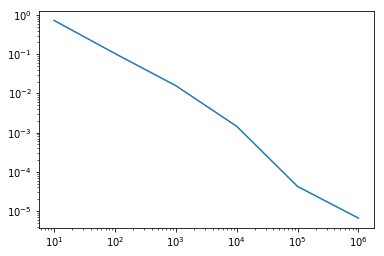

In [14]:
n_values = np.zeros(shape=(6,1))
n_values[0] = 10
n_values[1] = 10**2
n_values[2] = 10**3
n_values[3] = 10**4
n_values[4] = 10**5
n_values[5] = 10**6
plt.loglog(n_values, error)
print(error)
plt.show()